In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
WRFDAT = xr.open_dataset('~/Downloads/wrfout.nc')

In [4]:
WRFDAT

<xarray.Dataset>
Dimensions:                (Time: 13, bottom_top: 32, bottom_top_stag: 33, seed_dim_stag: 8, soil_layers_stag: 4, south_north: 99, south_north_stag: 100, west_east: 99, west_east_stag: 100)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables: (12/201)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/129)
    TITLE:                            OUTPUT FROM WRF V4.1.4 MODEL
    START_DATE:                      2018-06-20_00:00:00
    SIMULATION_START_DATE:           2018-06-20_00:00:00
    WEST-EAST_GRID_DIMENSION:        100
    SOUTH-NORTH_GRID_DIMENSION:      100
    BOTTOM-TOP_GRID_DIMENSION:       33
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [5]:
LONS = WRFDAT.XLONG[0,:,:].squeeze()
LATS = WRFDAT.XLAT[0,:,:].squeeze()
LSM = WRFDAT.LANDMASK[0,:,:].squeeze()
Z = WRFDAT.HGT[0,:,:].squeeze()

t1 = 3

U10 = WRFDAT.U10[t1,:,:].squeeze()
V10 = WRFDAT.V10[t1,:,:].squeeze()
t2m = WRFDAT.T2[t1,:,:].squeeze() - 273.15
surfp = WRFDAT.PSFC[t1,:,:].squeeze()

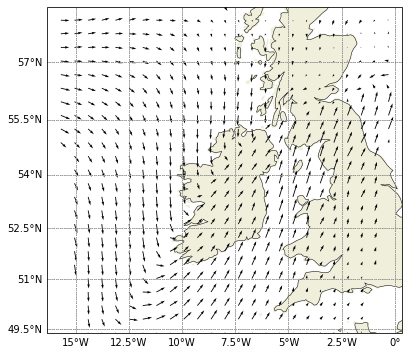

In [6]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.5)

ax.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
              crs=ccrs.PlateCarree())

ax.quiver(LONS.values, LATS.values, U10.values, V10.values,
          transform=ccrs.PlateCarree(), regrid_shape=25)

ax.add_feature(cfeature.LAND)
ax.gridlines(color="black", linestyle="dotted")

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels= False

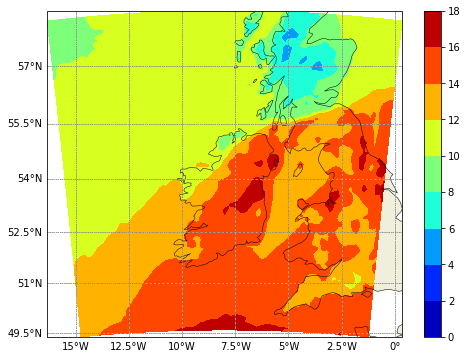

In [7]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.5)

ax.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
              crs=ccrs.PlateCarree())

clevs = np.arange(0,20,2)

my_cf = ax.contourf(LONS.values, LATS.values, t2m, levels=clevs,
            cmap="jet", transform=ccrs.PlateCarree())

plt.colorbar(my_cf)

ax.add_feature(cfeature.LAND)
ax.gridlines(color="black", linestyle="dotted")

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels= False

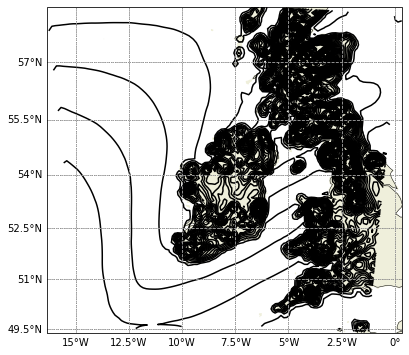

In [8]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.5)

ax.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
              crs=ccrs.PlateCarree())

ax.contour(LONS.values, LATS.values, surfp/100,
           np.arange(900,1200,2), colors='black',
          transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.gridlines(color="black", linestyle="dotted")

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels= False

In [9]:
surft = t2m+273.15 + (6.5*Z/1000)
mslp = surfp*np.exp(9.81/(287.0*surft)*Z)*0.01 + (6.7*Z/ 1000)

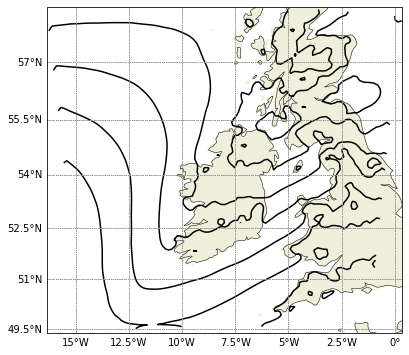

In [10]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.5)

ax.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
              crs=ccrs.PlateCarree())

ax.contour(LONS.values, LATS.values, mslp,
           np.arange(900,1200,2), colors='black',
          transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.gridlines(color="black", linestyle="dotted")

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels= False

In [11]:
import scipy.ndimage as scind

In [12]:
qwe = scind.uniform_filter(mslp, size=5, mode='constant')

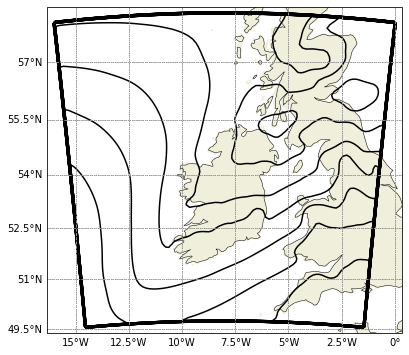

In [13]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines(resolution='50m', color='black', linewidth=0.5)

ax.set_extent([LONS.min(), LONS.max(), LATS.min(), LATS.max()],
              crs=ccrs.PlateCarree())

ax.contour(LONS.values, LATS.values, qwe,
           np.arange(900,1200,2), colors='black',
          transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.gridlines(color="black", linestyle="dotted")

grd = ax.gridlines(draw_labels=True, linestyle='--')
grd.top_labels = False
grd.right_labels= False

In [14]:
DUBLAT = 53.43
DUBLON = -6.25

In [15]:
Z2 = (LONS-DUBLON)**2 + (LATS-DUBLAT)**2

In [16]:
qwe = Z2.argmin(dim=(["south_north","west_east"]))

In [17]:
qwe

{'south_north': <xarray.DataArray ()>
 array(43)
 Coordinates:
     XTIME    datetime64[ns] 2018-06-20,
 'west_east': <xarray.DataArray ()>
 array(61)
 Coordinates:
     XTIME    datetime64[ns] 2018-06-20}

In [18]:
i = qwe[Z2.dims[0]]
j = qwe[Z2.dims[1]]

In [19]:
t2ms = WRFDAT.T2[:,:,:].squeeze() - 273.15

In [20]:
DUBt2m = t2ms[:,i,j]

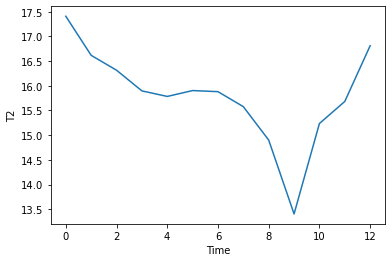

In [23]:
DUBt2m.plot()